Importing needed libraries

In [306]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from geopy.geocoders import Nominatim
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

Getting a BS to parse a wiki page and saving BS object to 'soup' variable

In [307]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

Saving column names and table content from parsed wiki page to the lists

In [308]:
data_table = soup.find('table')
name = data_table.find_all('th')
column_names = [''.join(string.text.split()) for string in name]
rows = data_table.find_all('tr')
data_list = []
for row in rows:
    rowlist = []
    try:
        tds = row.find_all('td')
        if len(tds) == 0: continue
        for td in tds:
            rowlist.append(td.text.strip())
        data_list.append(rowlist)
    except:
        pass

Creating a dataframe and cleaning data according to assignment instructions

In [309]:
df = pd.DataFrame(data=data_list, columns=column_names)
df = df.drop(df[df.Borough == 'Not assigned'].index)
df.reset_index(drop=True, inplace=True)
df.head(12)

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


Checking a shape of cleaned data frame

In [310]:
df.shape

(103, 3)

Using already created Geospatial Coordinates file, as geocoder requires Google API key.

In [313]:
coord_df = pd.read_csv('Geospatial_Coordinates.csv')
coord_df.rename(columns={'Postal Code':'PostalCode'}, inplace=True)
df = df.join(coord_df.set_index('PostalCode'), on='PostalCode')
df.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [314]:
df.Borough.unique()

array(['North York', 'Downtown Toronto', 'Etobicoke', 'Scarborough',
       'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

Getting a Toronto coordinates

In [318]:
address = 'Toronto, ONT'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(f'The geograpical coordinate of Toronto are {latitude}, {longitude}')

The geograpical coordinate of Toronto are 43.5483881, -79.66278143853629


Creating a Toronto map with its Neighbourhoods

In [319]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = f'{neighborhood}, {borough}'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Let's segment and cluster only the neighborhoods in a Boroughs which have a word York in their name

In [322]:
york_data = df.loc[df['Borough'].isin([item for item in df.Borough.unique() if 'York' in item])]
york_data.reset_index(drop=True, inplace=True)
york_data.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
3,M3B,North York,Don Mills,43.745906,-79.352188
4,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937


In [324]:
address = 'York, Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(f'The geograpical coordinate of York are {latitude}, {longitude}.')

The geograpical coordinate of York are 43.6896191, -79.479188.


In [332]:
map_york = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(york_data['Latitude'], york_data['Longitude'], york_data['Borough'], york_data['Neighbourhood']):
    label = f'{neighborhood}, {borough}'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_york)  
    
map_york

In [473]:
CLIENT_ID = '*****' # your Foursquare ID
CLIENT_SECRET = '*****' # your Foursquare Secret
ACCESS_TOKEN = '*****' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: *****
CLIENT_SECRET:*****


In [380]:
def getNearbyVenues(names, post_code, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, code, lat, lng in zip(names, post_code, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = f'https://api.foursquare.com/v2/venues/explore'
        ll = str(lat) + ',' + str(lng)
        params = {'client_id':CLIENT_ID,
                  'client_secret':CLIENT_SECRET,
                  'v':VERSION,
                  'll':ll,
                  'radius':radius,
                  'limit':LIMIT}
            
        # make the GET request
        results = requests.get(url, params=params).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            code,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        #print(venues_list)

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood',
                  'PostalCode',
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [381]:
york_venues = getNearbyVenues(york_data.Neighbourhood, york_data.PostalCode, york_data.Latitude, york_data.Longitude)

Parkwoods
Victoria Village
Lawrence Manor, Lawrence Heights
Don Mills
Parkview Hill, Woodbine Gardens
Glencairn
Don Mills
Woodbine Heights
Humewood-Cedarvale
Caledonia-Fairbanks
Leaside
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Bayview Village
Downsview
York Mills, Silver Hills
Downsview
North Park, Maple Leaf Park, Upwood Park
Humber Summit
Willowdale, Newtonbrook
Downsview
Bedford Park, Lawrence Manor East
Del Ray, Mount Dennis, Keelsdale and Silverthorn
Humberlea, Emery
Willowdale, Willowdale East
Downsview
Runnymede, The Junction North
Weston
York Mills West
Willowdale, Willowdale West


In [382]:
print(york_venues.shape)
york_venues.head()

(685, 8)


,Neighbourhood,PostalCode,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,M3A,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,M3A,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,M3A,43.753259,-79.329656,DVP at York Mills,43.758899,-79.334099,Intersection
3,Parkwoods,M3A,43.753259,-79.329656,TTC Stop #09083,43.759655,-79.332223,Bus Stop
4,Parkwoods,M3A,43.753259,-79.329656,TTC Stop 9083,43.759251,-79.334000,Bus Stop


In [394]:
york_venues.groupby(['Neighbourhood', 'PostalCode']).count()

Neighbourhood Latitude  \
Neighbourhood                                    PostalCode                           
Bathurst Manor, Wilson Heights, Downsview North  M3H                             24   
Bayview Village                                  M2K                             11   
Bedford Park, Lawrence Manor East                M5M                             39   
Caledonia-Fairbanks                              M6E                             18   
Del Ray, Mount Dennis, Keelsdale and Silverthorn M6M                              8   
Don Mills                                        M3B                              7   
                                                 M3C                             27   
Downsview                                        M3K                             13   
                                                 M3L                              9   
                                                 M3M                              4   
                                                 M3N                             27   
East Toronto, Broadview North (Old East York)    M4J                             47   
Fairview, Henry Farm, Oriole                     M2J                             39   
Glencairn                                        M6B                             25   
Hillcrest Village                                M2H                             17   
Humber Summit                                    M9L                             10   
Humberlea, Emery                                 M9M                              7   
Humewood-Cedarvale                               M6C                             20   
Lawrence Manor, Lawrence Heights                 M6A                             43   
Leaside                                          M4G                             54   
North Park, Maple Leaf Park, Upwood Park         M6L                              3   
Northwood Park, York University                  M3J                             16   
Parkview Hill, Woodbine Gardens                  M4B                             19   
Parkwoods                                        M3A                              5   
Runnymede, The Junction North                    M6N                             27   
Thorncliffe Park                                 M4H                             30   
Victoria Village                                 M4A                              6   
Weston                                           M9N                              8   
Willowdale, Newtonbrook                          M2M                             17   
Willowdale, Willowdale East                      M2N                             79   
Willowdale, Willowdale West                      M2R                              6   
Woodbine Heights                                 M4C                             11   
York Mills West                                  M2P                              8   
York Mills, Silver Hills                         M2L                              1   

                                                             Neighbourhood Longitude  \
Neighbourhood                                    PostalCode                            
Bathurst Manor, Wilson Heights, Downsview North  M3H                              24   
Bayview Village                                  M2K                              11   
Bedford Park, Lawrence Manor East                M5M                              39   
Caledonia-Fairbanks                              M6E                              18   
Del Ray, Mount Dennis, Keelsdale and Silverthorn M6M                               8   
Don Mills                                        M3B                               7   
                                                 M3C                              27   
Downsview                                        M3K                              13   
                                                

In [393]:
print(f'There are {len(york_venues["Venue Category"].unique())} uniques categories.')

There are 161 uniques categories.


Let's analyze Neighborhoods	

In [472]:
# one hot encoding
york_onehot = pd.get_dummies(york_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column to dataframe
york_onehot[['Neighbourhood', 'PostalCode']] = york_venues[['Neighbourhood', 'PostalCode']]
# rearranging columns that Neighbourhood and PostalCode comes first
cols = york_onehot.columns.tolist()
cols = cols[-2:] + cols[:-2]
york_onehot = york_onehot[cols]

york_onehot.head(5)

,Neighbourhood,PostalCode,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Store,Bike Shop,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Community Center,Convenience Store,Cosmetics Shop,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant,Field,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hockey Arena,Home Service,Hookah Bar,Hostel,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Moving Target,Nail Salon,Nightclub,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Salon / Barbershop,Sandwich Place,School,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Smoothie Shop,Soccer Stadium,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Thai Restaurant,Theater,Toy / Game Store,Trail,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,M3A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,M3A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,M3A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Parkwoods,M3A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Parkwoods,M3A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [411]:
york_grouped = york_onehot.groupby(['Neighbourhood', 'PostalCode']).mean().reset_index()
york_grouped.head()

,Neighbourhood,PostalCode,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Store,Bike Shop,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Community Center,Convenience Store,Cosmetics Shop,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant,Field,Financial or Legal Service,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hockey Arena,Home Service,Hookah Bar,Hostel,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Moving Target,Nail Salon,Nightclub,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Salon / Barbershop,Sandwich Place,School,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Smoothie Shop,Soccer Stadium,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Tailor Shop,Thai Restaurant,Theater,Toy / Game Store,Trail,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Bathurst Manor, Wilson Heights, Downsview North",M3H,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.083333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.083333,0.000000,0.041667,0.000,0.000000,0.000000,0.0,0.0,0.041667,0.0,0.000,0.0,0.041667,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.041667,0.0,0.041667,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.041667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.041667,0.0,0.0,0.000000,0.041667,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.000000,0.041667,0.083333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.041667,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.041667,0.041667,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.0
1,Bayview Village,M2K,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.181818,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.090909,0.0,0.0,0.090909,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.090909,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.090909,0.000000,0.181818,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.000000,0.000000,0.000000,0.0,0

In [412]:
york_grouped.shape

(34, 163)

 Let's create the new dataframe and display the top 10 venues for each neighborhood.

In [434]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [451]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood', 'PostalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted[['Neighbourhood', 'PostalCode']] = york_grouped[['Neighbourhood', 'PostalCode']]

for ind in np.arange(york_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 2:] = return_most_common_venues(york_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",M3H,Bank,Pizza Place,Coffee Shop,Shopping Mall,Sandwich Place,Bridal Shop,Restaurant,Park,Community Center,Pharmacy
1,Bayview Village,M2K,Japanese Restaurant,Bank,Chinese Restaurant,Intersection,Café,Skating Rink,Grocery Store,Park,Shopping Mall,Cosmetics Shop
2,"Bedford Park, Lawrence Manor East",M5M,Italian Restaurant,Coffee Shop,Sandwich Place,Home Service,Comfort Food Restaurant,Bridal Shop,Pub,Pizza Place,Pharmacy,Pet Store
3,Caledonia-Fairbanks,M6E,Mexican Restaurant,Park,Pharmacy,Pizza Place,Bakery,Women's Store,Japanese Restaurant,Cosmetics Shop,Grocery Store,Café
4,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",M6M,Auto Garage,Dessert Shop,Wine Shop,Grocery Store,Convenience Store,Sandwich Place,Gas Station,Discount Store,Event Space,Ethiopian Restaurant


Let's start clustering on this data

In [438]:
york_grouped_clustering = york_grouped.drop(['Neighbourhood', 'PostalCode'], 1)
york_grouped_clustering = york_grouped_clustering.values

In [439]:
york_grouped_clustering.shape

(34, 161)

In [440]:
# set random number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters=kclusters).fit(york_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Finding best k value

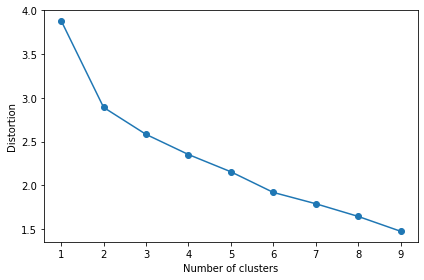

In [441]:
inert = []
for i in range(1,10):
    km = KMeans(init = "k-means++", n_clusters = i)
    km.fit(york_grouped_clustering)
    inert.append(km.inertia_)
plt.plot(range(1, 10), inert, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

Let's choose k = 6 value as we can see from the graph Distortion falls quite rapidly till we reach 6 clusters.

In [442]:
kclusters = 6

# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters=kclusters).fit(york_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 4, 4, 4, 4, 4, 4, 4, 1, 3, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 0, 1,
       4, 5, 1, 4, 4, 1, 1, 4, 1, 4, 4, 2])

In [452]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [459]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighbourhood,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,"Bathurst Manor, Wilson Heights, Downsview North",M3H,Bank,Pizza Place,Coffee Shop,Shopping Mall,Sandwich Place,Bridal Shop,Restaurant,Park,Community Center,Pharmacy
1,4,Bayview Village,M2K,Japanese Restaurant,Bank,Chinese Restaurant,Intersection,Café,Skating Rink,Grocery Store,Park,Shopping Mall,Cosmetics Shop
2,4,"Bedford Park, Lawrence Manor East",M5M,Italian Restaurant,Coffee Shop,Sandwich Place,Home Service,Comfort Food Restaurant,Bridal Shop,Pub,Pizza Place,Pharmacy,Pet Store
3,4,Caledonia-Fairbanks,M6E,Mexican Restaurant,Park,Pharmacy,Pizza Place,Bakery,Women's Store,Japanese Restaurant,Cosmetics Shop,Grocery Store,Café
4,4,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",M6M,Auto Garage,Dessert Shop,Wine Shop,Grocery Store,Convenience Store,Sandwich Place,Gas Station,Discount Store,Event Space,Ethiopian Restaurant


In [458]:
york_merged = york_data
york_merged.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
3,M3B,North York,Don Mills,43.745906,-79.352188
4,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937


In [460]:
# merge two dataframes
york_merged = york_merged.merge(neighborhoods_venues_sorted, left_on=['PostalCode', 'Neighbourhood'], right_on=['PostalCode', 'Neighbourhood'])
york_merged.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,5,Bus Stop,Park,Intersection,Food & Drink Shop,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Discount Store,Diner
1,M4A,North York,Victoria Village,43.725882,-79.315572,4,Playground,Portuguese Restaurant,Intersection,Park,Coffee Shop,Hockey Arena,Convenience Store,Dessert Shop,Event Space,Ethiopian Restaurant
2,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,4,Clothing Store,Furniture / Home Store,Dessert Shop,Restaurant,Vietnamese Restaurant,Fried Chicken Joint,Fast Food Restaurant,Coffee Shop,Miscellaneous Shop,Accessories Store
3,M3B,North York,Don Mills,43.745906,-79.352188,4,Japanese Restaurant,Gym,Paper / Office Supplies Store,Athletics & Sports,Caribbean Restaurant,Café,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store
4,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,4,Pizza Place,Bakery,Brewery,Gastropub,Intersection,Flea Market,Fast Food Restaurant,Coffee Shop,Pet Store,Pharmacy


In [461]:
york_merged.shape

(34, 16)

At the end, let's visualize the resulting clusters

In [462]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters)) 
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(york_merged['Latitude'], york_merged['Longitude'], york_merged['Neighbourhood'], york_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters